In [83]:
# 相关库导入
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [84]:
# 数据读取
Market_Basket = pd.read_csv('Market_Basket_Optimisation.csv', header=None, sep='\t')
Market_Basket.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [85]:
# 生成一个订单列表 transactions
transactions = list(Market_Basket[0].str.split(','))

# 前五个订单
print(transactions[0:5])      

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]


In [86]:
# 将所有订单的商品放到Items列表中
Items=[]
for Item in transactions:
    Items += Item

# 前31个商品
print(Items[0:31])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [93]:
# 由于接下来按照空格分词，因此需要将'vegetables mix'这样多个单词表示单个商品的样本，
# 用'_'先拼接起来，避免最后分开计算'vegetables'和'mix'的词频
for i, u in enumerate(Market_Basket_str):
    Items[i] = Items[i].replace(' ', '_')

# 前31个商品
print(Items[0:31])

['shrimp', 'almonds', 'avocado', 'vegetables_mix', 'green_grapes', 'whole_weat_flour', 'yams', 'cottage_cheese', 'energy_drink', 'tomato_juice', 'low_fat_yogurt', 'green_tea', 'honey', 'salad', 'mineral_water', 'salmon', 'antioxydant_juice', 'frozen_smoothie', 'spinach', 'olive_oil', 'burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral_water', 'milk', 'energy_bar', 'whole_wheat_rice', 'green_tea']


In [94]:
def Top_N(data=Items, N=10):
    '''
    输入商品列表Items，返回数量最多的前N个Item
    '''
    df_topN = pd.DataFrame(data, columns=['Item']).value_counts()[:N]
    return df_topN

In [95]:
def remove_stop_word(stop_words, x):
    '''
    stop_words: list，停用词列表；
    x: str.
    '''
    for stop_word in stop_words:
        x.replace(stop_word, ' ')
    return x

In [105]:
def create_wordcloud(stop_words, text):
    '''
    生成词云
    '''
    text = remove_stop_word(stop_words, text)
    cut_word = ' '.join(word_tokenize(text))        
    
    # 创建WordCloud实例
    wc = WordCloud(max_words=10,                  
                   height=300, 
                   width=400, 
                   collocations=False)      
    wordcloud = wc.generate(cut_word)
    
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

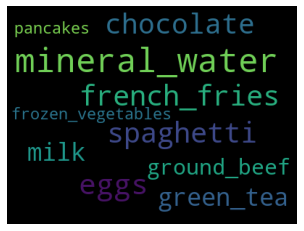

In [106]:
stopwords = ['food', 'The']
create_wordcloud(stopwords, ' '.join(Items))

In [107]:
Top_N(Items, 10)

Item             
mineral_water        1788
eggs                 1348
spaghetti            1306
french_fries         1282
chocolate            1230
green_tea             991
milk                  972
ground_beef           737
frozen_vegetables     715
pancakes              713
dtype: int64